In [1]:
import pyemma as py
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [2]:
fig_save_path = '/Users/ssolieva/Desktop/github_repo/IL2-dynamics/analysis-files/rmsd/figures/'

# mini helix rmsd

In [7]:
def generate_rmsds_mini_helix(which_system, save_path, directory_path):
    f = open(f"{directory_path}IL2_simulations_{which_system}/FAST_RMSD/msm/traj_list.txt", "r")
    traj_list = f.read().splitlines()
    #print(f'Here is an example of a line in traj_list.txt: \n {traj_list[0]}')
    pdb_path = f'{directory_path}IL2_simulations_{which_system}/{which_system}-prot-masses.pdb'
    ref_path = f'{directory_path}IL2_simulations_1m47_c125s/1m47_c125s-prot-masses.pdb'
    top_file = md.load(ref_path) # load in the reference file
    helix = top_file.topology.select(f'residue 33 to 41 and name CA')
    rmsds = []
    for t in range(len(traj_list)):
        if t in [20,40,60,80]:
            print(which_system,'progress:', t, '% done')
        traj=md.load(traj_list[t], top=pdb_path)
        rmsds.append(md.rmsd(traj, top_file, atom_indices=helix, ref_atom_indices=helix))
    np.save(f'{save_path}rmsd_miniHelix_wt_to_{which_system}.npy', rmsds)
    return rmsds  

In [8]:
save_path = '../data/'
directory_path = '/Users/ssolieva/Desktop/bowman_lab/projects/IL2/simulations/'

rmsd_values_mini_helix = []
for system in ['1m47_c125s', 'seq15_c125s', 'seq1_c123s', 'seq1_c123s_L56A', 'seq1_c123s_V84A']:
    rmsd_values_mini_helix.append(generate_rmsds_mini_helix(system, save_path, directory_path))

1m47_c125s progress: 20 % done
1m47_c125s progress: 40 % done
1m47_c125s progress: 60 % done
1m47_c125s progress: 80 % done
seq15_c125s progress: 20 % done
seq15_c125s progress: 40 % done
seq15_c125s progress: 60 % done
seq15_c125s progress: 80 % done
seq1_c123s progress: 20 % done
seq1_c123s progress: 40 % done
seq1_c123s progress: 60 % done
seq1_c123s progress: 80 % done
seq1_c123s_L56A progress: 20 % done
seq1_c123s_L56A progress: 40 % done
seq1_c123s_L56A progress: 60 % done
seq1_c123s_L56A progress: 80 % done
seq1_c123s_V84A progress: 20 % done
seq1_c123s_V84A progress: 40 % done
seq1_c123s_V84A progress: 60 % done
seq1_c123s_V84A progress: 80 % done


# B helix rmsd

In [10]:
def generate_rmsds_B_helix(which_system, save_path, directory_path):
    f = open(f"{directory_path}IL2_simulations_{which_system}/FAST_RMSD/msm/traj_list.txt", "r")
    traj_list = f.read().splitlines()
    #print(f'Here is an example of a line in traj_list.txt: \n {traj_list[0]}')
    pdb_path = f'{directory_path}IL2_simulations_{which_system}/{which_system}-prot-masses.pdb'
    ref_path = f'{directory_path}IL2_simulations_1m47_c125s/1m47_c125s-prot-masses.pdb'
    top_file = md.load(ref_path) # load in the reference file
    B_helix = top_file.topology.select(f'residue 54 to 72 and name CA')
    rmsds = []
    for t in range(len(traj_list)):
        if t in [20,40,60,80]:
            print(which_system,'progress:', t, '% done')
        traj=md.load(traj_list[t], top=pdb_path)
        rmsds.append(md.rmsd(traj, top_file, atom_indices=B_helix, ref_atom_indices=B_helix))
    np.save(f'{save_path}rmsd_BHelix_wt_to_{which_system}.npy', rmsds)
    return rmsds  

In [11]:
save_path = './'
directory_path = '/Users/ssolieva/Desktop/bowman_lab/projects/IL2/simulations/'

rmsd_values = []
for system in ['1m47_c125s', 'seq15_c125s', 'seq1_c123s', 'seq1_c123s_L56A', 'seq1_c123s_V84A']:
    rmsd_values.append(generate_rmsds_B_helix(system, save_path, directory_path))

1m47_c125s progress: 20 % done
1m47_c125s progress: 40 % done
1m47_c125s progress: 60 % done
1m47_c125s progress: 80 % done
seq15_c125s progress: 20 % done
seq15_c125s progress: 40 % done
seq15_c125s progress: 60 % done
seq15_c125s progress: 80 % done
seq1_c123s progress: 20 % done
seq1_c123s progress: 40 % done
seq1_c123s progress: 60 % done
seq1_c123s progress: 80 % done
seq1_c123s_L56A progress: 20 % done
seq1_c123s_L56A progress: 40 % done
seq1_c123s_L56A progress: 60 % done
seq1_c123s_L56A progress: 80 % done
seq1_c123s_V84A progress: 20 % done
seq1_c123s_V84A progress: 40 % done
seq1_c123s_V84A progress: 60 % done
seq1_c123s_V84A progress: 80 % done


In [12]:
rmsd_values_B_helix= rmsd_values

# C helix rmsd

In [13]:
def generate_rmsds_C_helix(which_system, save_path, directory_path, seq1_numbering):
    f = open(f"{directory_path}IL2_simulations_{which_system}/FAST_RMSD/msm/traj_list.txt", "r")
    traj_list = f.read().splitlines()
    #print(f'Here is an example of a line in traj_list.txt: \n {traj_list[0]}')
    pdb_path = f'{directory_path}IL2_simulations_{which_system}/{which_system}-prot-masses.pdb'
    ref_path = f'{directory_path}IL2_simulations_1m47_c125s/1m47_c125s-prot-masses.pdb'
    top_file = md.load(ref_path) # load in the reference file

    if seq1_numbering == 'true':
        helix = top_file.topology.select(f'residue 80 to 94 and name CA')
    if seq1_numbering == 'false':
        helix = top_file.topology.select(f'residue 82 to 96 and name CA')
    rmsds = []
    for t in range(len(traj_list)):
        if t in [20,40,60,80]:
            print(which_system,'progress:', t, '% done')
        traj=md.load(traj_list[t], top=pdb_path)
        rmsds.append(md.rmsd(traj, top_file, atom_indices=helix, ref_atom_indices=helix))
    np.save(f'{save_path}rmsd_CHelix_wt_to_{which_system}.npy', rmsds)
    return rmsds  

In [14]:
save_path = './'
directory_path = '/Users/ssolieva/Desktop/bowman_lab/projects/IL2/simulations/'

rmsd_values_C_helix = []
for system in ['1m47_c125s', 'seq15_c125s']:
    rmsd_values_C_helix.append(generate_rmsds_C_helix(system, save_path, directory_path, 'false'))
for system in ['seq1_c123s', 'seq1_c123s_L56A', 'seq1_c123s_V84A']:
    rmsd_values_C_helix.append(generate_rmsds_C_helix(system, save_path, directory_path, 'true'))

1m47_c125s progress: 20 % done
1m47_c125s progress: 40 % done
1m47_c125s progress: 60 % done
1m47_c125s progress: 80 % done
seq15_c125s progress: 20 % done
seq15_c125s progress: 40 % done
seq15_c125s progress: 60 % done
seq15_c125s progress: 80 % done
seq1_c123s progress: 20 % done
seq1_c123s progress: 40 % done
seq1_c123s progress: 60 % done
seq1_c123s progress: 80 % done
seq1_c123s_L56A progress: 20 % done
seq1_c123s_L56A progress: 40 % done
seq1_c123s_L56A progress: 60 % done
seq1_c123s_L56A progress: 80 % done
seq1_c123s_V84A progress: 20 % done
seq1_c123s_V84A progress: 40 % done
seq1_c123s_V84A progress: 60 % done
seq1_c123s_V84A progress: 80 % done


# Plots

## 1D plots

In [86]:
B_RMSD_1m47 = np.concatenate(rmsd_values_B_helix[0])*10
B_RMSD_seq15= np.concatenate(rmsd_values_B_helix[1])*10
B_RMSD_seq1 = np.concatenate(rmsd_values_B_helix[2])*10
B_RMSD_L56A = np.concatenate(rmsd_values_B_helix[3])*10
B_RMSD_V84A = np.concatenate(rmsd_values_B_helix[4])*10

C_RMSD_1m47 = np.concatenate(rmsd_values_C_helix[0])*10
C_RMSD_seq15= np.concatenate(rmsd_values_C_helix[1])*10
C_RMSD_seq1 = np.concatenate(rmsd_values_C_helix[2])*10
C_RMSD_L56A = np.concatenate(rmsd_values_C_helix[3])*10
C_RMSD_V84A = np.concatenate(rmsd_values_C_helix[4])*10

mini_RMSD_1m47 = np.concatenate(rmsd_values_mini_helix[0])*10
mini_RMSD_seq15= np.concatenate(rmsd_values_mini_helix[1])*10
mini_RMSD_seq1 = np.concatenate(rmsd_values_mini_helix[2])*10
mini_RMSD_L56A = np.concatenate(rmsd_values_mini_helix[3])*10
mini_RMSD_V84A = np.concatenate(rmsd_values_mini_helix[4])*10

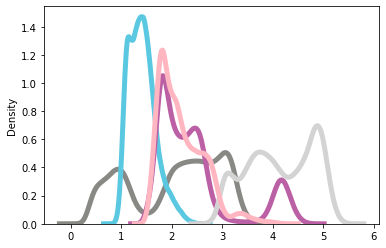

In [75]:
plt.plot(figsize=[5,2])
sns.kdeplot(B_RMSD_1m47,  c='#888985',  label='WT',   linewidth=5)
sns.kdeplot(B_RMSD_seq15, c='#5AC8E0',  label='S15',  linewidth=5)
sns.kdeplot(B_RMSD_seq1,  c='#BC60A5',  label='S1',   linewidth=5)
sns.kdeplot(B_RMSD_L56A,  c='lightgray',label='L56A', linewidth=5)
sns.kdeplot(B_RMSD_V84A,  c='lightpink',label='V84A', linewidth=5)
plt.show()

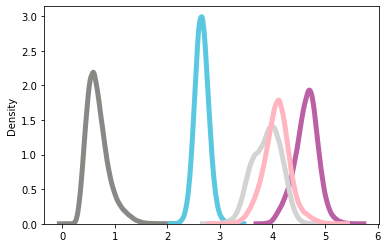

In [77]:
plt.plot(figsize=[5,2])
sns.kdeplot(C_RMSD_1m47,  c='#888985',  label='WT',   linewidth=5)
sns.kdeplot(C_RMSD_seq15, c='#5AC8E0',  label='S15',  linewidth=5)
sns.kdeplot(C_RMSD_seq1,  c='#BC60A5',  label='S1',   linewidth=5)
sns.kdeplot(C_RMSD_L56A,  c='lightgray',label='L56A', linewidth=5)
sns.kdeplot(C_RMSD_V84A,  c='lightpink',label='V84A', linewidth=5)
plt.show()

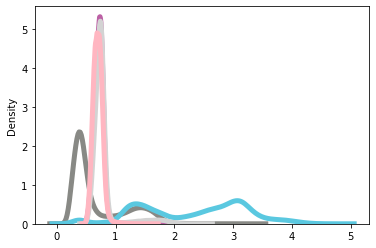

In [87]:
plt.plot(figsize=[5,2])
sns.kdeplot(mini_RMSD_1m47,  c='#888985',  label='WT',   linewidth=5)
sns.kdeplot(mini_RMSD_seq15, c='#5AC8E0',  label='S15',  linewidth=5)
sns.kdeplot(mini_RMSD_seq1,  c='#BC60A5',  label='S1',   linewidth=5)
sns.kdeplot(mini_RMSD_L56A,  c='lightgray',label='L56A', linewidth=5)
sns.kdeplot(mini_RMSD_V84A,  c='lightpink',label='V84A', linewidth=5)
plt.show()

## 2D plots

In [134]:
def plot_BC_scatter(title, B_RMSD, C_RMSD):
    plt.plot(figsize=[5,2])
    plt.title(f'{title}', fontsize=20, weight='bold')
    plt.hexbin(B_RMSD, C_RMSD,  bins='log')
    plt.xlabel('B helix RMSD to WT (A)', fontsize=17, weight='bold')
    plt.ylabel('C helix RMSD to WT (A)', fontsize=17, weight='bold')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(0,6)
    plt.ylim(0,6)
    plt.savefig(f'{fig_save_path}C_vs_B_helix_{title}.pdf',transparent=True, dpi=300, bbox_inches = "tight")
    plt.show()

def plot_miniB_scatter(title, B_RMSD, mini_RMSD):
    plt.plot(figsize=[5,2])
    plt.title(f'{title}', fontsize=20, weight='bold')
    plt.hexbin(B_RMSD, mini_RMSD,  bins='log')
    plt.xlabel('B helix RMSD to WT (A)',    fontsize=17, weight='bold')
    plt.ylabel('mini helix RMSD to WT (A)', fontsize=17, weight='bold')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(0,6)
    plt.ylim(0,5)
    plt.tight_layout()
    plt.savefig(f'{fig_save_path}mini_vs_B_helix_{title}.pdf',transparent=True, dpi=300, bbox_inches = "tight")
    plt.show()

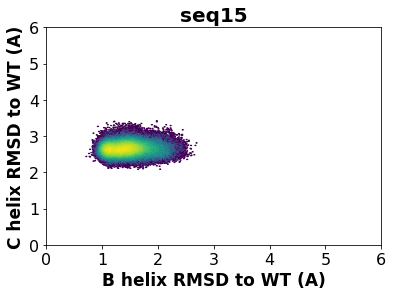

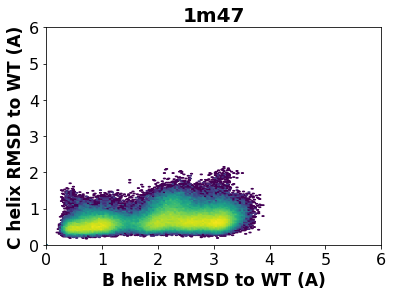

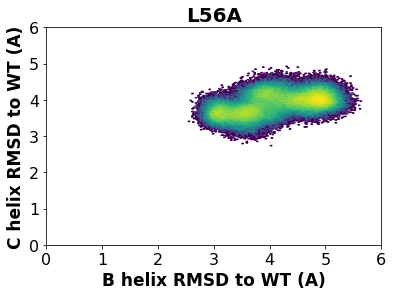

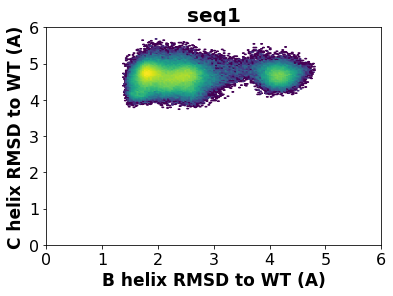

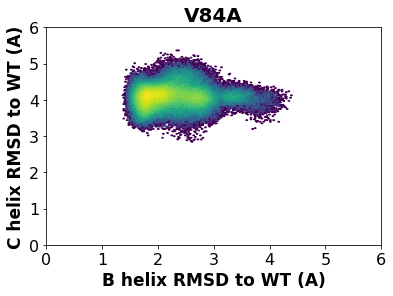

In [136]:
plot_BC_scatter('seq15', B_RMSD_seq15, C_RMSD_seq15)
plot_BC_scatter('1m47', B_RMSD_1m47, C_RMSD_1m47)
plot_BC_scatter('L56A', B_RMSD_L56A, C_RMSD_L56A)
plot_BC_scatter('seq1', B_RMSD_seq1, C_RMSD_seq1)
plot_BC_scatter('V84A', B_RMSD_V84A, C_RMSD_V84A)

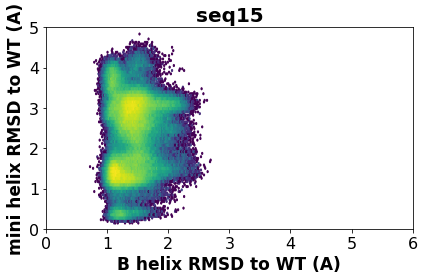

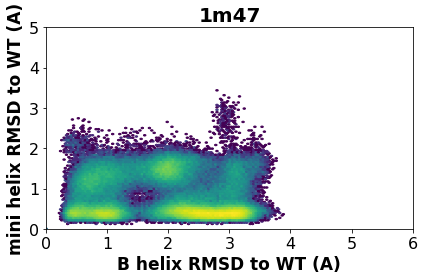

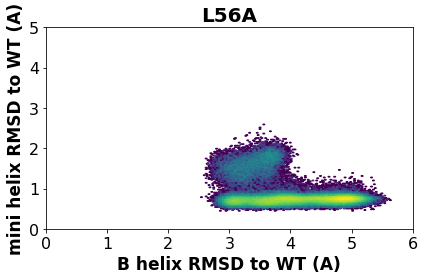

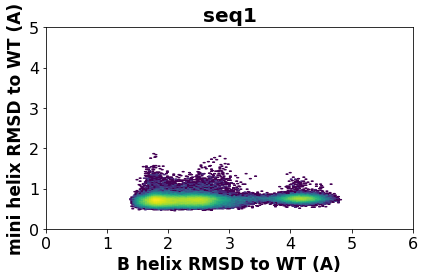

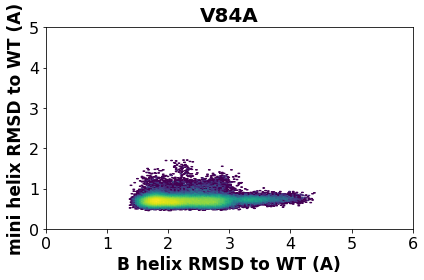

In [135]:
plot_miniB_scatter('seq15',B_RMSD_seq15,mini_RMSD_seq15)
plot_miniB_scatter('1m47', B_RMSD_1m47, mini_RMSD_1m47)
plot_miniB_scatter('L56A', B_RMSD_L56A, mini_RMSD_L56A)
plot_miniB_scatter('seq1', B_RMSD_seq1, mini_RMSD_seq1)
plot_miniB_scatter('V84A', B_RMSD_V84A, mini_RMSD_V84A)

# Psuedo trajectories

In [146]:
traj_index = []
for gen in range(10):
    for kid in range(10):
        for frame in range(2501):
            traj_index.append([gen,kid,frame])

## WT

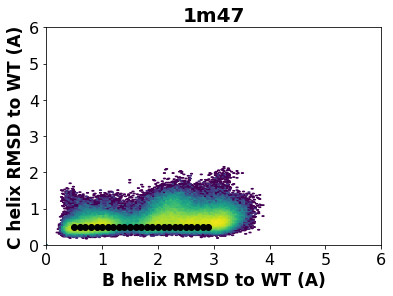

In [203]:
title = '1m47'
B_RMSD = B_RMSD_1m47
C_RMSD = C_RMSD_1m47

linex = np.arange(0.5,3,0.1) #[0.5,1,  1.5,2,  2.5,3]
liney = np.array([0.5]*len(linex)) 

plt.plot(figsize=[5,2])
plt.title(f'{title}', fontsize=20, weight='bold')
plt.hexbin(B_RMSD, C_RMSD,  bins='log')
plt.xlabel('B helix RMSD to WT (A)', fontsize=17, weight='bold')
plt.ylabel('C helix RMSD to WT (A)', fontsize=17, weight='bold')
plt.scatter(linex, liney, color='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,6)
plt.ylim(0,6)
plt.savefig(f'/Users/ssolieva/Desktop/github_repo/IL2-dynamics/analysis-files/rmsd/pseudo_trajectories/{title}.png', bbox_inches='tight')
plt.show()

In [163]:
save_gen = []
save_kid = []
save_frame = []
for value in range(len(linex)):
    for i in range(len(B_RMSD)):
        if linex[value]-0.01 <= B_RMSD[i] <= linex[value]+0.01 and liney[value]-0.01 <= C_RMSD[i] <= liney[value]+0.01:
            #print(value, i, B_RMSD[i], traj_index[i])
            save_gen.append(traj_index[i][0])
            save_kid.append(traj_index[i][1])
            save_frame.append(traj_index[i][2])
            break

In [164]:
frames_save_path = '/Users/ssolieva/Desktop/github_repo/IL2-dynamics/analysis-files/rmsd/pseudo_trajectories/1m47_c125s/'

In [165]:
which_system = '1m47_c125s'
directory_path = f'/Users/ssolieva/Desktop/bowman_lab/projects/IL2/simulations/IL2_simulations_{which_system}/FAST_RMSD/msm/'
f = open(f"{directory_path}traj_list.txt", "r")
traj_list = f.read().splitlines()
print(f'Here is an example of a line in traj_list.txt: \n {traj_list[0]}')
pdb_path = f'{directory_path}{which_system}-prot-masses.pdb'

for i in range(len(save_frame)):
    pdb_frame = md.load_frame(traj_list[int(save_gen[i])*10+int(save_kid[i])], index=int(save_frame[i]), top=pdb_path)
    pdb_frame.save(f'{frames_save_path}/{i}_gen{save_gen[i]}_kid{save_kid[i]}_frame{save_frame[i]}.pdb')

Here is an example of a line in traj_list.txt: 
 /Users/ssolieva/Desktop/bowman_lab/projects/IL2/simulations/IL2_simulations_1m47_c125s/FAST_RMSD/msm/trajectories/trj_gen000_kid000.xtc


## S1

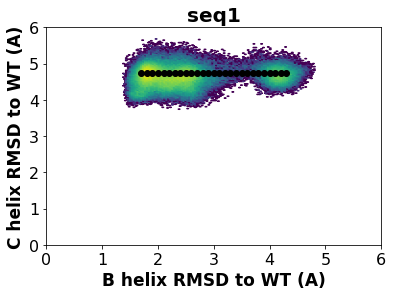

In [202]:
title = 'seq1'
B_RMSD = B_RMSD_seq1
C_RMSD = C_RMSD_seq1

linex = np.arange(1.7,4.4,0.1) #[0.5,1,  1.5,2,  2.5,3]
liney = np.array([4.75]*len(linex)) 

plt.plot(figsize=[5,2])
plt.title(f'{title}', fontsize=20, weight='bold')
plt.hexbin(B_RMSD, C_RMSD,  bins='log')
plt.xlabel('B helix RMSD to WT (A)', fontsize=17, weight='bold')
plt.ylabel('C helix RMSD to WT (A)', fontsize=17, weight='bold')
plt.scatter(linex, liney, color='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,6)
plt.ylim(0,6)
plt.savefig(f'/Users/ssolieva/Desktop/github_repo/IL2-dynamics/analysis-files/rmsd/pseudo_trajectories/{title}.png', bbox_inches='tight')
plt.show()

In [175]:
save_gen = []
save_kid = []
save_frame = []
for value in range(len(linex)):
    for i in range(len(B_RMSD)):
        if linex[value]-0.01 <= B_RMSD[i] <= linex[value]+0.01 and liney[value]-0.01 <= C_RMSD[i] <= liney[value]+0.01:
            #print(value, i, B_RMSD[i], traj_index[i])
            save_gen.append(traj_index[i][0])
            save_kid.append(traj_index[i][1])
            save_frame.append(traj_index[i][2])
            break

In [179]:
frames_save_path = '/Users/ssolieva/Desktop/github_repo/IL2-dynamics/analysis-files/rmsd/pseudo_trajectories/seq1_c123s/'

In [180]:
which_system = 'seq1_c123s'
directory_path = f'/Users/ssolieva/Desktop/bowman_lab/projects/IL2/simulations/IL2_simulations_{which_system}/FAST_RMSD/msm/'
f = open(f"{directory_path}traj_list.txt", "r")
traj_list = f.read().splitlines()
print(f'Here is an example of a line in traj_list.txt: \n {traj_list[0]}')
pdb_path = f'{directory_path}{which_system}-prot-masses.pdb'

for i in range(len(save_frame)):
    pdb_frame = md.load_frame(traj_list[int(save_gen[i])*10+int(save_kid[i])], index=int(save_frame[i]), top=pdb_path)
    pdb_frame.save(f'{frames_save_path}/{i}_gen{save_gen[i]}_kid{save_kid[i]}_frame{save_frame[i]}.pdb')

Here is an example of a line in traj_list.txt: 
 /Users/ssolieva/Desktop/bowman_lab/projects/IL2/simulations/IL2_simulations_seq1_c123s/FAST_RMSD/msm/trj_gen000_kid000.xtc


## V84A

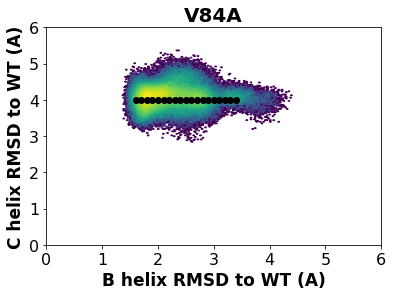

In [201]:
title = 'V84A'
B_RMSD = B_RMSD_V84A
C_RMSD = C_RMSD_V84A

linex = np.arange(1.6,3.5,0.1) #[0.5,1,  1.5,2,  2.5,3]
liney = np.array([4]*len(linex)) 

plt.plot(figsize=[5,2])
plt.title(f'{title}', fontsize=20, weight='bold')
plt.hexbin(B_RMSD, C_RMSD,  bins='log')
plt.xlabel('B helix RMSD to WT (A)', fontsize=17, weight='bold')
plt.ylabel('C helix RMSD to WT (A)', fontsize=17, weight='bold')
plt.scatter(linex, liney, color='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,6)
plt.ylim(0,6)
plt.savefig(f'/Users/ssolieva/Desktop/github_repo/IL2-dynamics/analysis-files/rmsd/pseudo_trajectories/{title}.png', bbox_inches='tight')
plt.show()
plt.show()

In [185]:
save_gen = []
save_kid = []
save_frame = []
for value in range(len(linex)):
    for i in range(len(B_RMSD)):
        if linex[value]-0.01 <= B_RMSD[i] <= linex[value]+0.01 and liney[value]-0.01 <= C_RMSD[i] <= liney[value]+0.01:
            #print(value, i, B_RMSD[i], traj_index[i])
            save_gen.append(traj_index[i][0])
            save_kid.append(traj_index[i][1])
            save_frame.append(traj_index[i][2])
            break

In [186]:
frames_save_path = '/Users/ssolieva/Desktop/github_repo/IL2-dynamics/analysis-files/rmsd/pseudo_trajectories/V84A_c123s/'

In [188]:
which_system = 'seq1_c123s_V84A'
directory_path = f'/Users/ssolieva/Desktop/bowman_lab/projects/IL2/simulations/IL2_simulations_{which_system}/FAST_RMSD/msm/'
f = open(f"{directory_path}traj_list.txt", "r")
traj_list = f.read().splitlines()
print(f'Here is an example of a line in traj_list.txt: \n {traj_list[0]}')
pdb_path = f'{directory_path}{which_system}-prot-masses.pdb'

for i in range(len(save_frame)):
    pdb_frame = md.load_frame(traj_list[int(save_gen[i])*10+int(save_kid[i])], index=int(save_frame[i]), top=pdb_path)
    pdb_frame.save(f'{frames_save_path}/{i}_gen{save_gen[i]}_kid{save_kid[i]}_frame{save_frame[i]}.pdb')

Here is an example of a line in traj_list.txt: 
 /Users/ssolieva/Desktop/bowman_lab/projects/IL2/simulations/IL2_simulations_seq1_c123s_V84A/FAST_RMSD/msm/trj_gen000_kid000.xtc


## L56A

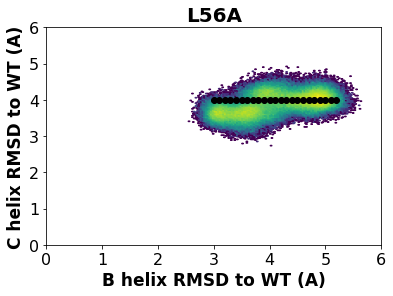

In [200]:
title = 'L56A'
B_RMSD = B_RMSD_L56A
C_RMSD = C_RMSD_L56A

linex = np.arange(3,5.3,0.1) #[0.5,1,  1.5,2,  2.5,3]
liney = np.array([4]*len(linex)) 

plt.plot(figsize=[5,2])
plt.title(f'{title}', fontsize=20, weight='bold')
plt.hexbin(B_RMSD, C_RMSD,  bins='log')
plt.xlabel('B helix RMSD to WT (A)', fontsize=17, weight='bold')
plt.ylabel('C helix RMSD to WT (A)', fontsize=17, weight='bold')
plt.scatter(linex, liney, color='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,6)
plt.ylim(0,6)
plt.savefig(f'/Users/ssolieva/Desktop/github_repo/IL2-dynamics/analysis-files/rmsd/pseudo_trajectories/{title}.png', bbox_inches='tight')
plt.show()

In [196]:
save_gen = []
save_kid = []
save_frame = []
for value in range(len(linex)):
    for i in range(len(B_RMSD)):
        if linex[value]-0.01 <= B_RMSD[i] <= linex[value]+0.01 and liney[value]-0.01 <= C_RMSD[i] <= liney[value]+0.01:
            #print(value, i, B_RMSD[i], traj_index[i])
            save_gen.append(traj_index[i][0])
            save_kid.append(traj_index[i][1])
            save_frame.append(traj_index[i][2])
            break

In [197]:
frames_save_path = '/Users/ssolieva/Desktop/github_repo/IL2-dynamics/analysis-files/rmsd/pseudo_trajectories/L56A_c123s/'

In [199]:
which_system = 'seq1_c123s_L56A'
directory_path = f'/Users/ssolieva/Desktop/bowman_lab/projects/IL2/simulations/IL2_simulations_{which_system}/FAST_RMSD/msm/'
f = open(f"{directory_path}traj_list.txt", "r")
traj_list = f.read().splitlines()
print(f'Here is an example of a line in traj_list.txt: \n {traj_list[0]}')
pdb_path = f'{directory_path}{which_system}-prot-masses.pdb'

for i in range(len(save_frame)):
    pdb_frame = md.load_frame(traj_list[int(save_gen[i])*10+int(save_kid[i])], index=int(save_frame[i]), top=pdb_path)
    pdb_frame.save(f'{frames_save_path}/{i}_gen{save_gen[i]}_kid{save_kid[i]}_frame{save_frame[i]}.pdb')

Here is an example of a line in traj_list.txt: 
 /Users/ssolieva/Desktop/bowman_lab/projects/IL2/simulations/IL2_simulations_seq1_c123s_L56A/FAST_RMSD/msm/trj_gen000_kid000.xtc
